In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mfcc.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mfcc.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mfcc.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mfcc.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 40), (4499, 1), (4233, 41), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 40, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=64,activation='relu',
         return_sequences=True,
         input_shape=(40,1)
     ),
     tf.keras.layers.LSTM(
         units=128,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=256,
         activation='relu'
     ),
     tf.keras.layers.Dense(
         units=512,
         activation='relu'
     ),


     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 285,450
Trainable params: 285,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_mfcc=model.fit(X_train, y_train, batch_size=64, epochs=120, validation_data=(X_test, y_test))

Train...
Epoch 1/120
71/71 [==============================] - 6s 60ms/step - loss: 2.1602 - accuracy: 0.1887 - val_loss: 2.1633 - val_accuracy: 0.2010
Epoch 2/120
71/71 [==============================] - 4s 53ms/step - loss: 2.0228 - accuracy: 0.2383 - val_loss: 2.0934 - val_accuracy: 0.2129
Epoch 3/120
71/71 [==============================] - 4s 54ms/step - loss: 4.0830 - accuracy: 0.2438 - val_loss: 2.4270 - val_accuracy: 0.2391
Epoch 4/120
71/71 [==============================] - 4s 55ms/step - loss: 1.9305 - accuracy: 0.2725 - val_loss: 2.2163 - val_accuracy: 0.2079
Epoch 5/120
71/71 [==============================] - 5s 67ms/step - loss: 1.9120 - accuracy: 0.2814 - val_loss: 2.0620 - val_accuracy: 0.2464
Epoch 6/120
71/71 [==============================] - 5s 68ms/step - loss: 1.8401 - accuracy: 0.3256 - val_loss: 2.0135 - val_accuracy: 0.2762
Epoch 7/120
71/71 [==============================] - 5s 68ms/step - loss: 1.7824 - accuracy: 0.3414 - val_loss: 1.9974 - val_accuracy: 0.29

71/71 [==============================] - 6s 92ms/step - loss: 0.0693 - accuracy: 0.9796 - val_loss: 5.6554 - val_accuracy: 0.3853
Epoch 116/120
71/71 [==============================] - 7s 96ms/step - loss: 0.1337 - accuracy: 0.9564 - val_loss: 5.5894 - val_accuracy: 0.3733
Epoch 117/120
71/71 [==============================] - 6s 91ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 5.7346 - val_accuracy: 0.3848
Epoch 118/120
71/71 [==============================] - 7s 93ms/step - loss: 0.0485 - accuracy: 0.9867 - val_loss: 6.0944 - val_accuracy: 0.3688
Epoch 119/120
71/71 [==============================] - 7s 95ms/step - loss: 0.1001 - accuracy: 0.9682 - val_loss: 5.9347 - val_accuracy: 0.3697
Epoch 120/120
71/71 [==============================] - 7s 92ms/step - loss: 0.0791 - accuracy: 0.9749 - val_loss: 5.6080 - val_accuracy: 0.3891


In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 285,450
Trainable params: 285,450
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 4s 18ms/step - loss: 5.6080 - accuracy: 0.3891
Pre-training accuracy: 38.

In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9902200698852539
Testing Accuracy:  0.3890857696533203


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.3890857696533203


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[3 2 2 ... 9 9 2]


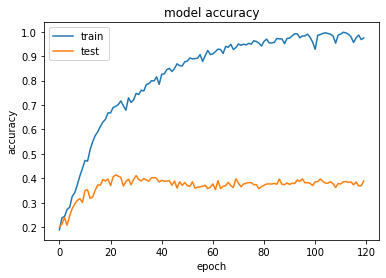

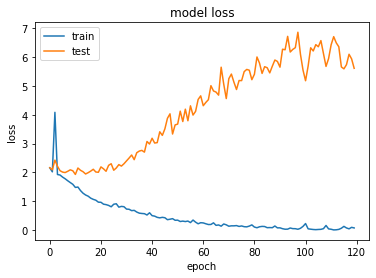

In [14]:
# summarize history for accuracy
plt.plot(model_mfcc.history['accuracy'])
plt.plot(model_mfcc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mfcc.history['loss'])
plt.plot(model_mfcc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
train_hist = pd.DataFrame(model_mfcc.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.160239,0.188709,2.163317,0.201039
1,2.022829,0.238275,2.093361,0.212851
2,4.083014,0.243832,2.427035,0.239074
3,1.930460,0.272505,2.216269,0.207890
4,1.912039,0.281396,2.061992,0.246397
...,...,...,...,...
115,0.133673,0.956435,5.589430,0.373258
116,0.078923,0.975106,5.734631,0.384833
117,0.048467,0.986664,6.094398,0.368769
118,0.100072,0.968215,5.934749,0.369714


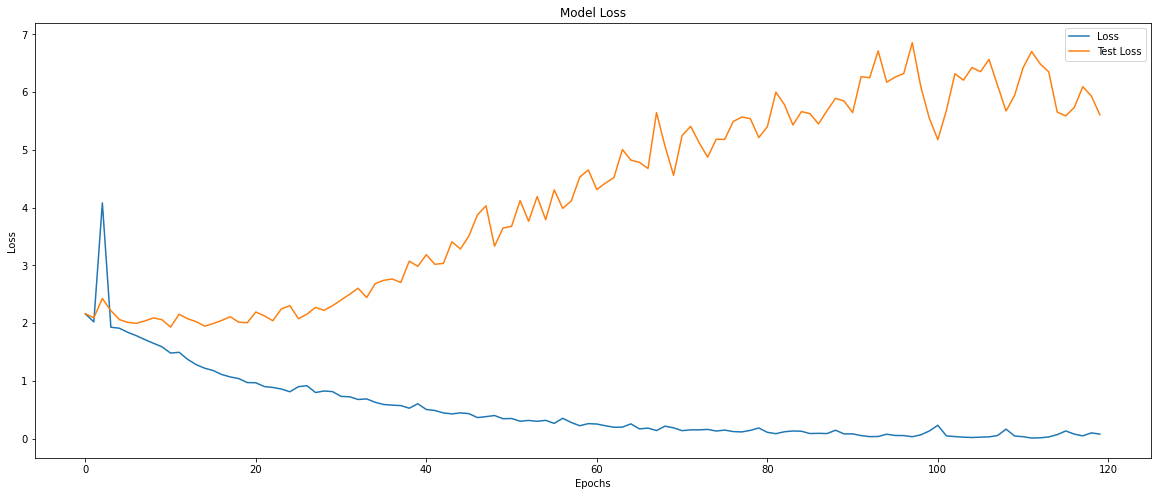

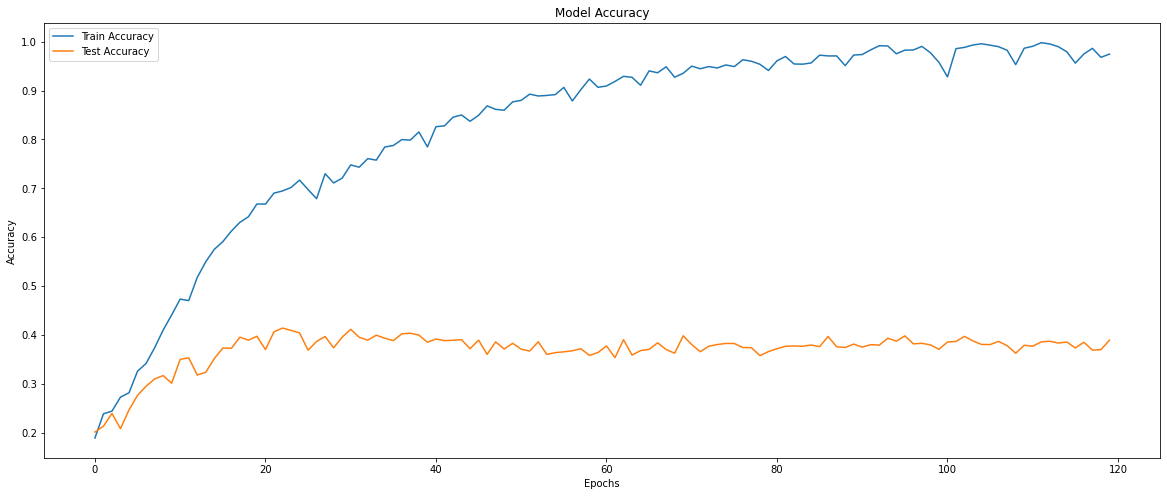

In [16]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [17]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 92  10  40  77  51  27   0  60  55  88]
 [  7 162   4   5   2   2   0  15   2  22]
 [ 20   2 191 123  32  15  22   3  23  69]
 [  8  10  75 252  40  10   9  19  38  39]
 [ 13  36  46  48 116  30   7 101  23  80]
 [118   7  36  21   7 205   0  22  33  34]
 [  2   0  31  25   4   1  95   1   6  19]
 [  6  66  12  15 134   7   0 140  39  33]
 [ 15  12  29  91  24   2   2  25 162  31]
 [ 50  33  39  23  45  14   3  43  18 232]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.28      0.18      0.22       500
           1       0.48      0.73      0.58       221
           2       0.38      0.38      0.38       500
           3       0.37      0.50      0.43       500
           4       0.25      0.23      0.24       500
           5       0.65      0.42      0.52       483
           6       0.69      0.52      0.59       184
           7       0.33      0.31      0.32       452
           8       0.41      0.